# 2024: Week 4 - Unpopular Seats
### January 24, 2024
### Created by: Carl Allchin

Last week you needed to use a Join technique to pair the flight data with the sales targets. This week you'll be using Joins again but this time in a different way. 

When using Joins, there are two things you need to set up:

 - Join Condition - what logic will join similar rows of data together from each data set
 - Join Type - determines what data you will bring back based on the Join Condition

This challenge will test using join types to return the data you require for the output.

This week we are trying to understand which seats aren't chosen on our planes as we're thinking of applying fees for customers to choose their seat when booking. 

### Input
Seat allocation per customer. We have had three downloads sent to us, one for the Flow Card customers and two where they aren't Flow Card customers. They're available here.


### Requirements
 - Input the Excel workbook containing the four worksheets of data
 - Union the Flow Card and Non-Flow card data sets together
 - Create a data field to show whether the seat was booked by someone with the Flow Card or not
      - Call this field 'Flow Card?'
 - Aggregate the Seat Bookings to count how many bookings there are for:
      - Each Seat
      - In each Row
      - In each Class
      - For Flow and Non-Flow Card holders
 - Join on the Seating Plan data to ensure you have a data set for every seat on the plane, even if it hasn't been book
      - Only return the records for the seats that haven't been booked
 - Output the data set showing what seat, rows and class have NOT been booked


### Output
### 3 data fields:
 - Class
 - Seat
 - Row

We're not saying how many rows this week as this is the answer we'd like you to post in your solutions! 

You can download the outputs from here. If you want to check your results. 

After you finish the challenge make sure to fill in the participation tracker, then share your solution on Twitter using #PreppinData and tagging @Datajedininja, @JennyMartinDS14 & @TomProwse1
You can also post your solution on the Tableau Forum where we have a Preppin' Data community page. Post your solutions and ask questions if you need any help! 



In [71]:
import pandas as pd
import os
import numpy as np


In [72]:
# Input data
df_dict = pd.read_excel('PD 2024 Wk 4 Input.xlsx',sheet_name=None)

In [73]:
df_dict.keys()

dict_keys(['Flow Card', 'Non_flow Card', 'Non_flow Card2', 'Seat Plan'])

In [74]:
# Combine sheets:
# Return relevant sheet names

selection_dict=[]
for k,v in enumerate(df_dict.keys()):
  if k!=3:
    selection_dict.append(v)
    print(k,v)

selection_dict

0 Flow Card
1 Non_flow Card
2 Non_flow Card2


['Flow Card', 'Non_flow Card', 'Non_flow Card2']

In [75]:
# Loop through each sheet and add a column

combined_df = pd.DataFrame()

for df in selection_dict:
  interim_df=df_dict[df]

  if 'Non_flow' in df:
    interim_df['flow_card']='non_flow_card'
  else:
    interim_df['flow_card']='flow_card'

  combined_df=pd.concat([combined_df,interim_df])
  combined_df.reset_index(drop=True)
  
combined_df.columns

Index(['CustomerID', 'Seat', 'Row', 'Class', 'flow_card'], dtype='object')

In [76]:
'''
- Aggregate the Seat Bookings to count how many bookings there are for:
- Each Seat
- In each Row
- In each Class
- For Flow and Non-Flow Card holders
'''

'\n- Aggregate the Seat Bookings to count how many bookings there are for:\n- Each Seat\n- In each Row\n- In each Class\n- For Flow and Non-Flow Card holders\n'

In [77]:
aggrigate_df=combined_df.groupby(['Seat', 'Row', 'Class', 'flow_card']).agg({'CustomerID':'count'}).rename(columns={'CustomerID':'count_seats'}).reset_index()

In [78]:
# Combine the Seat Plan to the aggrigate so that we can see which seats are not used:
# input data
seat_df = df_dict['Seat Plan']
merged_df=seat_df.merge(aggrigate_df,on=['Class','Seat','Row'],how='left',validate='one_to_many')

In [79]:
merged_df.loc[merged_df.count_seats.isna()].drop(columns=['flow_card','count_seats']).to_csv('empty_seats.csv',index=False)
# os.startfile('empty_seats.csv')

In [80]:
merged_df['Row']=merged_df['Row'].astype('object')

<Axes: xlabel='Seat', ylabel='count_seats'>

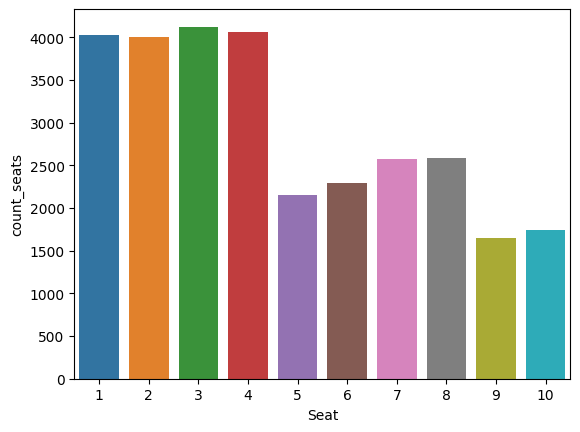

In [81]:
import seaborn as sns

x=merged_df.groupby('Seat').sum(numeric_only=True).reset_index()['Seat']
y=merged_df.groupby('Seat').sum(numeric_only=True).reset_index()['count_seats']

sns.barplot(x=x,y=y)

<Axes: xlabel='Class', ylabel='count_seats'>

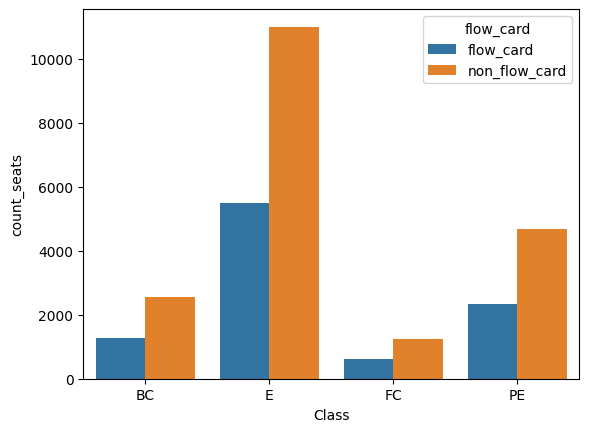

In [90]:
classes_df=merged_df.groupby(['Class','flow_card']).sum(numeric_only=True).reset_index()
sns.barplot(classes_df,x=classes_df['Class'],y=classes_df['count_seats'],hue=classes_df['flow_card'])


In [ ]:
classes_df=merged_df.groupby(['Class','flow_card']).sum(numeric_only=True).reset_index()

from matplotlib import pyplot as plt

plt.bar()

sns.barplot(classes_df,x=classes_df['Class'],y=classes_df['count_seats'],hue=classes_df['flow_card'])

<Axes: xlabel='Class', ylabel='count_seats'>

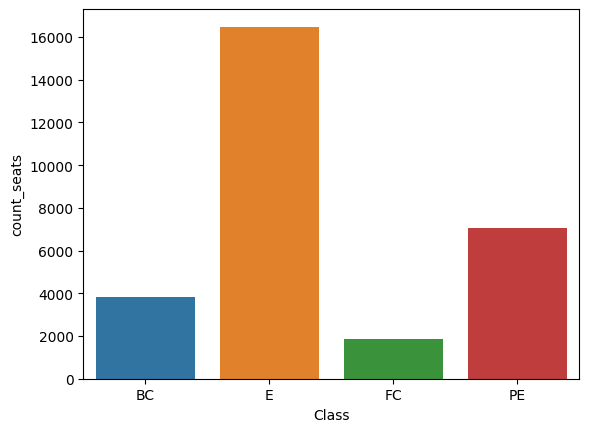

In [84]:

classes_df=merged_df.groupby(['Class']).sum(numeric_only=True).reset_index()
sns.barplot(classes_df,x=classes_df['Class'],y=classes_df['count_seats'])